In [1]:
# This is an amateur's attempt to predict ad-click event based on Time spent on site, Age and Area income

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['advertising.csv']


In [2]:
ad_df=pd.read_csv('../input/advertising.csv')

In [3]:
ad_df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


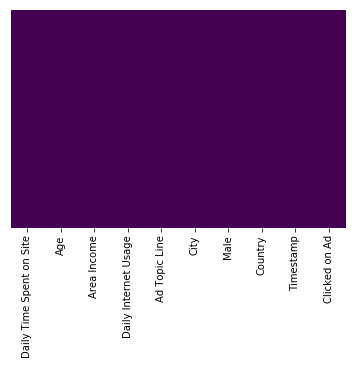

In [4]:
sns.heatmap(ad_df.isnull(), yticklabels=False, cbar=False, cmap='viridis') # missing data heatmap

In [5]:
sns.set_style('whitegrid')

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


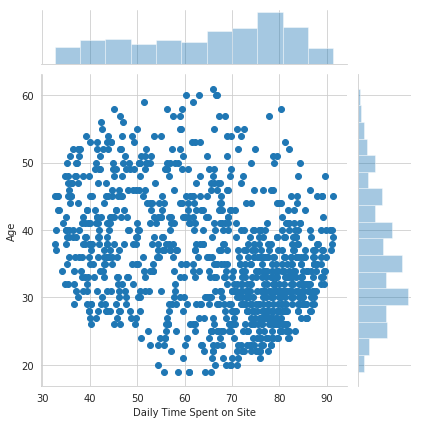

In [6]:
sns.jointplot(x='Daily Time Spent on Site',y='Age',data=ad_df)

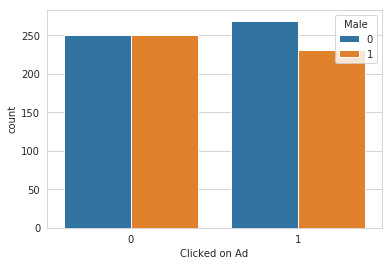

In [7]:
sns.countplot(x='Clicked on Ad', hue='Male', data=ad_df) # Clicked event based on Male/female

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


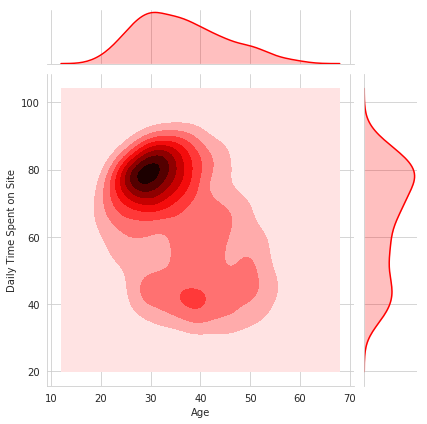

In [8]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=ad_df,color='red',kind='kde');

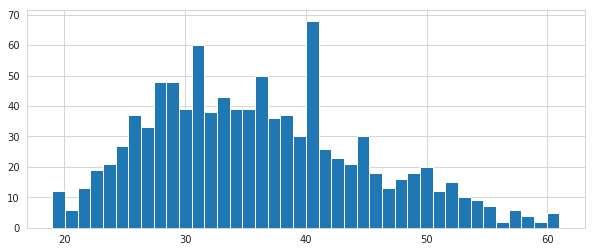

In [9]:
ad_df['Age'].hist(bins=40, figsize=(10,4))

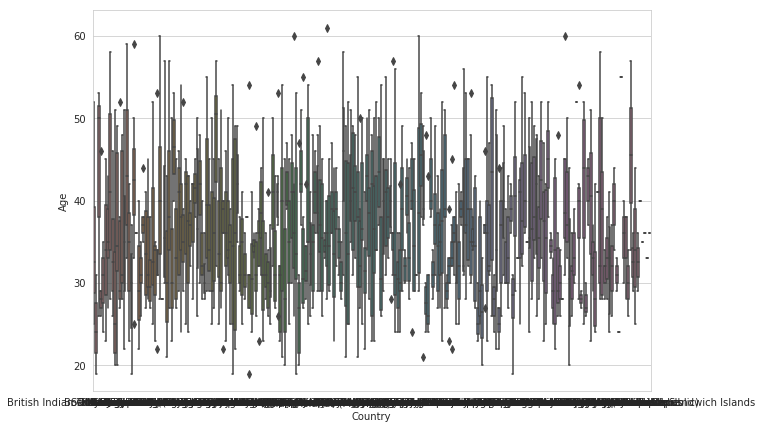

In [10]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Country', y='Age', data=ad_df) # country wise data range by 

In [11]:
X=ad_df[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']]
y=ad_df['Clicked on Ad']

In [12]:
from sklearn.model_selection import train_test_split #Random split dataset in to train and test 

In [13]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=101) # Random split X & y datasets

In [14]:
X_test.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
545,42.60,55,55121.65,168.29
298,80.39,31,66269.49,214.74
109,74.02,32,72272.90,210.54
837,55.77,49,55942.04,117.33
194,77.20,33,49325.48,254.05


In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
logreg=LogisticRegression()

In [17]:
#onehot_encoded_X_train=pd.get_dummies(X_train) categorical value dummies was found unnecessary
#onehot_encoded_y_train=pd.get_dummies(y_train)

In [18]:
logreg.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [19]:
predictions = logreg.predict(X_test)

In [20]:
from sklearn.metrics import classification_report

In [21]:
print (classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

   micro avg       0.92      0.92      0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300

